In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, minmax_scale
from sklearn.metrics import r2_score
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras import optimizers

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/refs/heads/master/testdata_utf8/Advertising.csv')
# print(data.head(2))

del data['no']
# print(data.head(2))

fdata = data[['tv', 'radio','newspaper']]
ldata = data[['sales']]
# print(fdata[:2], ldata[:2])

# 정규화
# scaler = MinMaxScaler(feature_range=(0,1))
# fedata = scaler.fit_transform(fdata)
# print(fedata[:2])

fedata = minmax_scale(fdata, axis=0, copy=True) # 원본 보존
print(fedata[:3])

# train/test
x_train, x_test, y_train, y_test = train_test_split(fedata, ldata, test_size=0.3, random_state=123)

# model
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile
model.compile(optimizer='adam', loss='mse', metrics=['mse'])
print(model.summary())

# tf.keras.utils.plot_model(model, 'tf13.png')

history = model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.2)
# validation_data = (x_vali, y_vali)

[[0.77578627 0.76209677 0.60598065]
 [0.1481231  0.79233871 0.39401935]
 [0.0557998  0.92540323 0.60686016]]


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 209.8096 - mse: 209.8096 - val_loss: 276.7978 - val_mse: 276.7978
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 207.6062 - mse: 207.6062 - val_loss: 274.1388 - val_mse: 274.1388
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 205.5705 - mse: 205.5705 - val_loss: 271.5009 - val_mse: 271.5009
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 203.4172 - mse: 203.4172 - val_loss: 268.9042 - val_mse: 268.9042
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 201.3392 - mse: 201.3392 - val_loss: 266.3553 - val_mse: 266.3553
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 199.3036 - mse: 199.3036 - val_loss: 263.9004 - val_mse: 263.9004
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 197.3147 - mse: 197.3147 - val_loss: 261.5193 - val_mse: 261.5193
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 195.3853 - mse: 195.3853 - val_loss: 259.1976 - val_mse: 259.1976
Epo

loss : [5.382490158081055, 5.382490158081055]
loss : [209.80960083007812, 207.6062469482422, 205.57052612304688, 203.417236328125, 201.3391876220703, 199.3036346435547, 197.314697265625, 195.3853302001953, 193.54795837402344, 191.75732421875, 189.84152221679688, 188.0709686279297, 186.16720581054688, 184.24143981933594, 182.23622131347656, 180.19554138183594, 178.15101623535156, 176.06410217285156, 173.9044189453125, 171.65115356445312, 169.40245056152344, 166.974609375, 164.561767578125, 161.9935760498047, 159.4065399169922, 156.72715759277344, 153.89718627929688, 151.03762817382812, 148.0338897705078, 145.07797241210938, 141.8622283935547, 138.6735382080078, 135.310791015625, 132.01791381835938, 128.49888610839844, 125.09088134765625, 121.47978973388672, 117.947265625, 114.28531646728516, 110.70512390136719, 106.95597076416016, 103.16450500488281, 99.43772888183594, 95.61743927001953, 91.84979248046875, 88.21312713623047, 84.33451080322266, 80.60778045654297, 76.92302703857422, 73.25

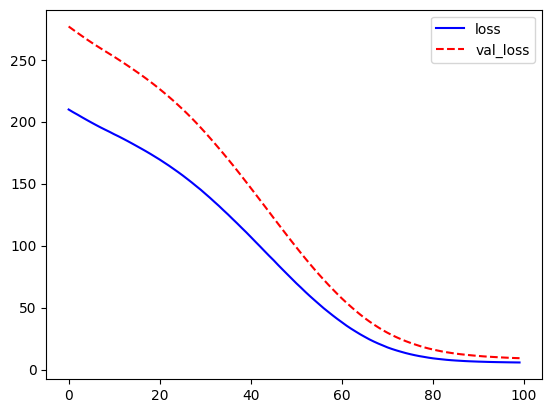

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
0.7959227561950684


In [ ]:
# 모델 평가 점수
loss = model.evaluate(x_test, y_test, verbose=0)
print('loss :', loss)

# history 값 확인
# print('history :', history.history)
print('loss :', history.history['loss'])
print('mse :', history.history['mse'])
print('val_loss :', history.history['val_loss'])
print('val_mse :', history.history['val_mse'])

# loss 시각화
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.legend()
plt.show()
# 둘 값의 차이가 크면 안된다.

# r2_score
print(r2_score(y_test, model.predict(x_test)))

